In [4]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from mpl_toolkits.mplot3d import Axes3D


---
# VIDEO: Finding eigenvalues
---


[-1.  6.]


<IPython.core.display.Javascript object>


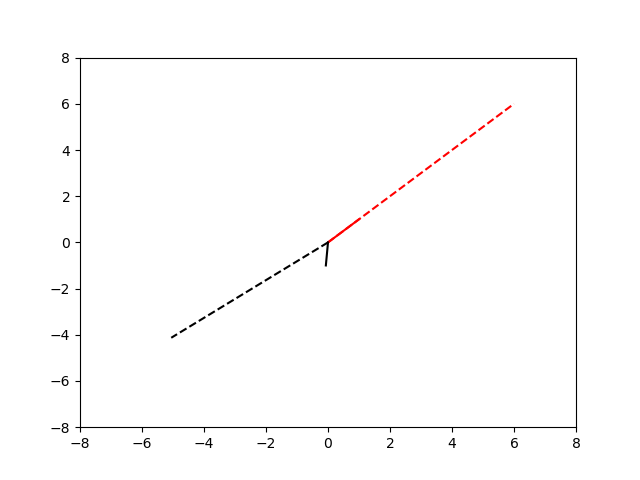

In [26]:
# matrix
A = [ [1,5], [2,4] ]

# extract the eigenvalues
eigvals = np.linalg.eig(A)

# note that with the above syntax, the eigenvalues are in the first element of eigvals:
print(eigvals[0])


# specify two vectors
v1 = np.array([ 1,1 ])    # is an eigenvector!
v2 = np.random.randn(2,1) # unlikely to be an eigenvector
v2 = v2/np.linalg.norm(v2)# unit length for convenience

# compute Av
Av1 = A@v1
Av2 = A@v2

#plt.close()
# plot the vectors and Av
plt.plot([0,v1[0]] ,[0,v1[1]],'r')
plt.plot([0,Av1[0]],[0,Av1[1]],'r--')
plt.plot([0,v2[0]] ,[0,v2[1]],'k')
plt.plot([0,Av2[0]],[0,Av2[1]],'k--')

plt.axis([-8,8,-8,8])
plt.show()


In [3]:
# confirm eigenvalues for a 3x3 matrix

# specify matrix
A = [ [-2,  2, -3 ],
      [-4,  1, -6 ],
      [-1, -2,  0 ]  ]

# get eigenvalues
evals = np.linalg.eig(A)
print(evals[0])


[-3. -1.  3.]


# Eigenvalues of diagonal and triangular matrices

In [38]:
# generate a 2x2 diagonal matrix and look at its eigen values
# repeat for a larger matrix
# triangular matrices (lower, upper)
A = np.diag([2, 1])
print(A)
print(np.linalg.eig(A)[0])

A2 = np.diag(range(1,11))
print(A2)
print(np.linalg.eig(A2)[0])

A3 = np.triu(np.random.randn(4, 4))
print(A3)
print(np.linalg.eig(A3)[0])

[[2 0]
 [0 1]]
[2. 1.]
[[ 1  0  0  0  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0  0  0  0]
 [ 0  0  3  0  0  0  0  0  0  0]
 [ 0  0  0  4  0  0  0  0  0  0]
 [ 0  0  0  0  5  0  0  0  0  0]
 [ 0  0  0  0  0  6  0  0  0  0]
 [ 0  0  0  0  0  0  7  0  0  0]
 [ 0  0  0  0  0  0  0  8  0  0]
 [ 0  0  0  0  0  0  0  0  9  0]
 [ 0  0  0  0  0  0  0  0  0 10]]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[[-0.27744398 -0.29525074 -1.50338601  1.27641438]
 [ 0.          0.67356808  0.19469752 -0.27208519]
 [ 0.          0.         -0.47319194  0.12359152]
 [ 0.          0.          0.          1.68684228]]
[-0.27744398  0.67356808 -0.47319194  1.68684228]


# Eigenvalues of random matrices

<IPython.core.display.Javascript object>


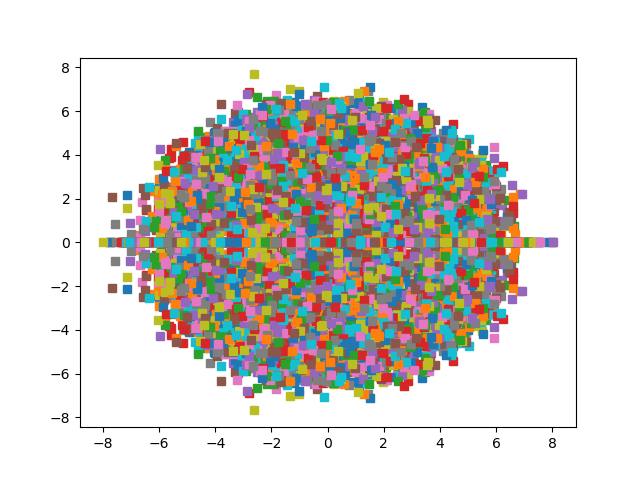

In [62]:
# generate large 40x40 matrices, extract eigenvalues, plot
# repeat this over and over and plot results

#A = np.random.randn(40, 40)
#evals = np.linalg.eig(A)

m = 41
nIter = 200

for i in range(nIter):
    tmp = np.random.randn(m,m)
    evals = np.linalg.eig(tmp)[0]
    plt.plot(evals.real, evals.imag, 's')


---
# VIDEO: Finding eigenvectors
---


[ 3. -1.]
0.9999999999999999 0.9999999999999999


<IPython.core.display.Javascript object>


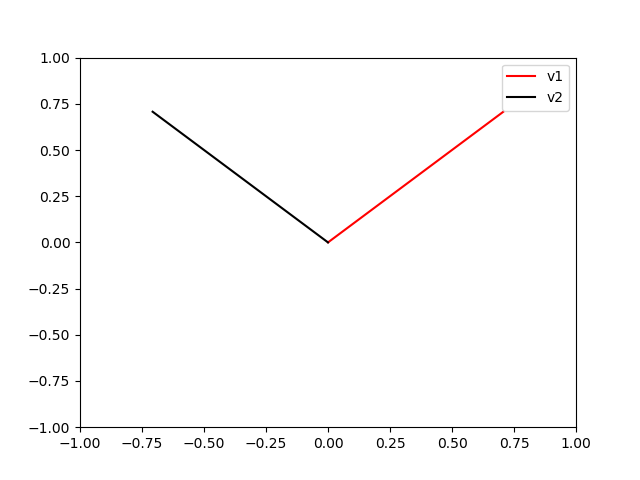

In [5]:
# matrix
A = [ [1,2], [2,1] ]

# eigenvectors (compare with code above)
# note also the differences with MATLAB: different order, evals in vector
evals,evecs = np.linalg.eig(A)
print(evals) # could be in a different order compared to MATLAB output...

# compute the norm of each eigenvector
mag_v1 = np.sqrt( np.sum( np.square(evecs[:,0])) )
mag_v2 = np.sqrt( np.sum( np.square(evecs[:,1])) )
print(mag_v1,mag_v2)
plt.close()

# plot
plt.plot([0,evecs[0,0]],[0,evecs[1,0]],'r',label='v1')
plt.plot([0,evecs[0,1]],[0,evecs[1,1]],'k',label='v2')


plt.axis([-1,1,-1,1])
plt.legend()
plt.show()


---
# VIDEO: Diagonalization
---


<IPython.core.display.Javascript object>


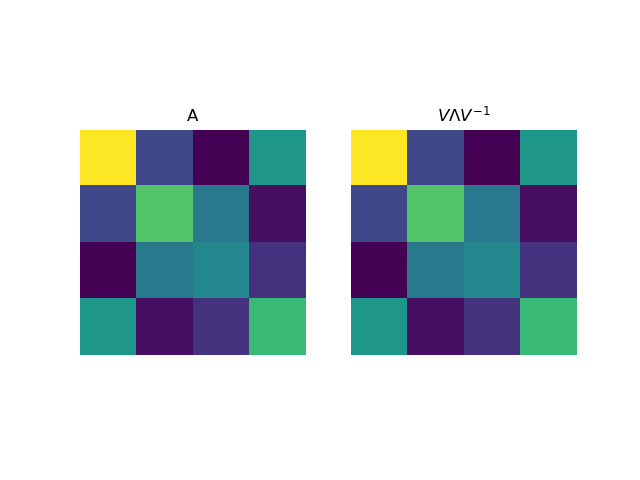

Reconstruction RMS: 2.446411640695566e-13


In [7]:
## eigendecomposition of A and A^N

# make a symmetric matrix
A = np.round(10*np.random.randn(4,4))
A = np.matrix.transpose(A)@A

# eigendecomposition
evals,evecs = np.linalg.eig(A)

# test reconstruction
Ap = evecs @ np.diag(evals) @ np.linalg.inv(evecs)
plt.close()

# plot
plt.subplot(121)
plt.imshow(A)
plt.axis('off')
plt.title('A')

plt.subplot(122)
plt.imshow(Ap)
plt.axis('off')
plt.title('$V\Lambda V^{-1}$')

plt.show()

# subtract the two (should be zero with rounding errors)
recondiff = A-Ap

# reconstruction error (due to inverse numerical inaccuracies)
rmsA = np.sqrt( np.mean(np.square( np.reshape(recondiff,(1,-1)) )) )

print('Reconstruction RMS:', rmsA)


<IPython.core.display.Javascript object>


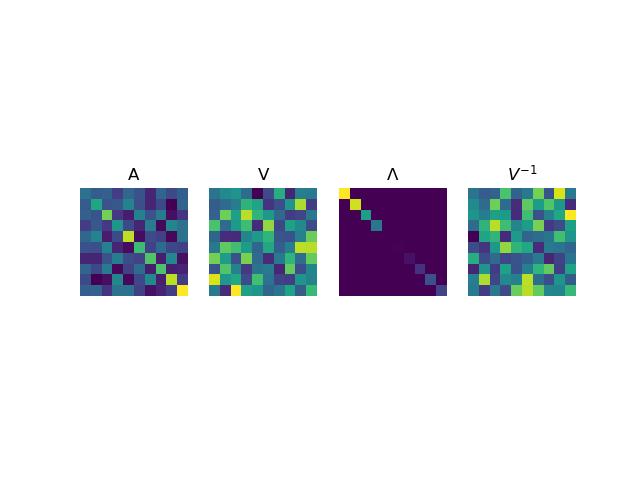

In [8]:
## diagonalization in images

# A matrix
A = np.random.randn(10,10)
A = A.T@A

# eigendecomposition
D,V = np.linalg.eig(A)
plt.close()

# show the results
plt.subplot(141)
plt.imshow(A)
plt.title('A')
plt.axis('off')

plt.subplot(142)
plt.imshow(V)
plt.title('V')
plt.axis('off')

plt.subplot(143)
plt.imshow(np.diag(D))
plt.title('$\Lambda$')
plt.axis('off')

plt.subplot(144)
plt.imshow(np.linalg.inv(V))
plt.title('$V^{-1}$')
plt.axis('off')

plt.show()


---
# VIDEO: Matrix powers via diagonalization
---


In [45]:
## matrix powers

A = np.random.rand(2,2)

# compute matrix power directly
print( np.linalg.matrix_power(A,3) ) # A*A*A

# and via eigendecomposition
D,V = np.linalg.eig(A)
D = np.diag(D)

# reproduce via diagonalization
print(V @ np.linalg.matrix_power(D,3) @ np.linalg.inv(V) )

[[ 0.05002486  0.02111072]
 [ 0.1240558   0.05237764]]
[[ 0.05002486  0.02111072]
 [ 0.1240558   0.05237764]]


[[ 0.44343114  0.88776532 -0.12345675]
 [ 0.72542114 -0.4363664  -0.53230492]
 [ 0.52643422 -0.14648243  0.83750218]] [[-0.44343114 -0.88776532 -0.12345675]
 [-0.72542114  0.4363664  -0.53230492]
 [-0.52643422  0.14648243  0.83750218]]


<IPython.core.display.Javascript object>


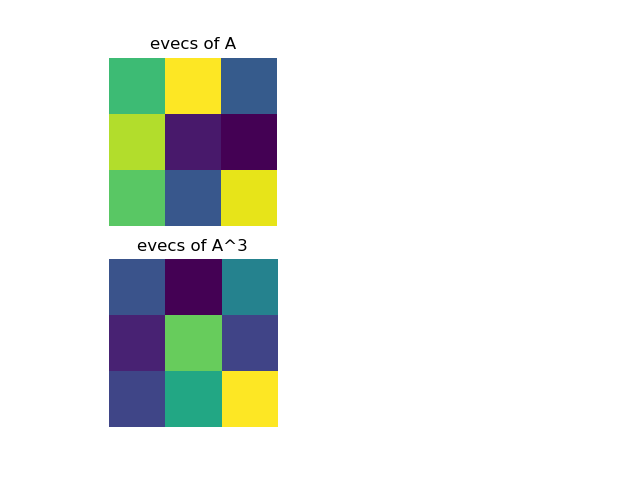

In [73]:
## eigenvalues of A and A^3

# create a symmetric matrix
A = np.random.rand(3,3)
A = A@A.T

D,V   = np.linalg.eig(A)
D3,V3 = np.linalg.eig( A@A@A )

print(V,V3)
plt.close()
plt.subplot(221)
plt.imshow(V)
plt.axis('off')
plt.title('evecs of A')

plt.subplot(223)
plt.imshow(V3)
plt.axis('off')
plt.title('evecs of A^3')

plt.show()

<IPython.core.display.Javascript object>


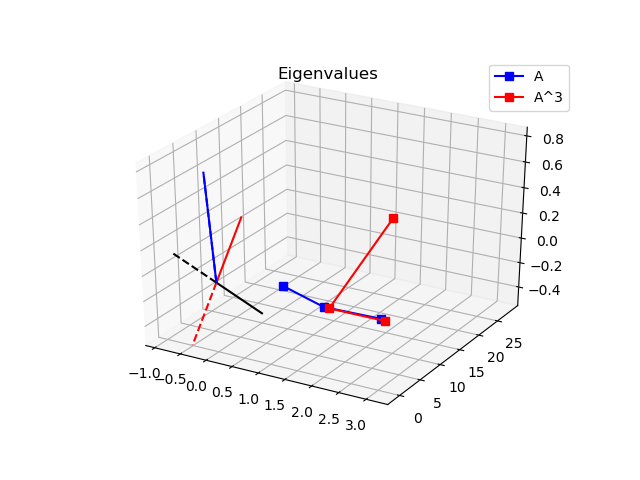

In [74]:
## plot the eigenvectors and eigenvalues
plt.close()
fig = plt.figure()
ax = fig.gca(projection='3d')

# plot eigenvectors of A
ax.plot([0,V[0,0]],[0,V[1,0]],[0,V[2,0]],'r')
ax.plot([0,V[0,1]],[0,V[1,1]],[0,V[2,1]],'k')
ax.plot([0,V[0,2]],[0,V[1,2]],[0,V[2,2]],'b')

# plot eigenvectors of A^3
ax.plot([0,V3[0,0]],[0,V3[1,0]],[0,V3[2,0]],'r--')
ax.plot([0,V3[0,1]],[0,V3[1,1]],[0,V3[2,1]],'k--')
ax.plot([0,V3[0,2]],[0,V3[1,2]],[0,V3[2,2]],'b--')

plt.show()

## show the eigenvalues
plt.plot([1,2,3],D,'bs-',label='A')
plt.plot([1.1,2.1,3.1],D3,'rs-',label='A^3')
plt.title('Eigenvalues')
plt.legend()
plt.show()

# Eigendecomposition of matrix differences

In [139]:
'''
Claim:
(A-B)v = lambda * v
(A^2 - AB-BA + B^2)v = lambda^2 * v

'''
A = np.random.randn(5, 5)
A = np.transpose(A) @ A

B = np.random.randn(5,5)
B = B @ np.transpose(B)

D1, V1 = np.linalg.eig(A-B)
D2, V2 = np.linalg.eig(A@A - A@B - B@A + B@B)

D1Sq = D1**2

print(D1Sq)
print(D2)

[ 98.90858286 166.24919779  37.68245289   0.23609422   6.19807892]
[166.24919779  98.90858286  37.68245289   0.23609422   6.19807892]



---
# VIDEO: Eigenvectors of repeated eigenvalues
---


In [17]:
# this code is copy-pasted with some light editing from:
# https://stackoverflow.com/questions/3461869/plot-a-plane-based-on-a-normal-vector-and-a-point-in-matlab-or-matplotlib

from matplotlib.patches import Circle, PathPatch
from matplotlib.transforms import Affine2D
from mpl_toolkits.mplot3d import art3d

def plot_vector(fig, orig, v, color='blue'):
    ax = fig.gca(projection='3d')
    orig = np.array(orig); v=np.array(v)
    ax.quiver(orig[0], orig[1], orig[2], v[0], v[1], v[2],color=color)
    ax.set_xlim(0,10);ax.set_ylim(0,10);ax.set_zlim(0,10)
    ax = fig.gca(projection='3d')  
    return fig

def rotation_matrix(d):
    sin_angle = np.linalg.norm(d)
    if sin_angle == 0:return np.identity(3)
    d /= sin_angle
    eye = np.eye(3)
    ddt = np.outer(d, d)
    skew = np.array([[    0,  d[2],  -d[1]],
                  [-d[2],     0,  d[0]],
                  [d[1], -d[0],    0]], dtype=np.float64)

    M = ddt + np.sqrt(1 - sin_angle**2) * (eye - ddt) + sin_angle * skew
    return M

def pathpatch_2d_to_3d(pathpatch, z, normal):
    if type(normal) is str: #Translate strings to normal vectors
        index = "xyz".index(normal)
        normal = np.roll((1.0,0,0), index)

    normal /= np.linalg.norm(normal) #Make sure the vector is normalised
    path = pathpatch.get_path() #Get the path and the associated transform
    trans = pathpatch.get_patch_transform()

    path = trans.transform_path(path) #Apply the transform

    pathpatch.__class__ = art3d.PathPatch3D #Change the class
    pathpatch._code3d = path.codes #Copy the codes
    pathpatch._facecolor3d = pathpatch.get_facecolor #Get the face color    

    verts = path.vertices #Get the vertices in 2D

    d = np.cross(normal, (0, 0, 1)) #Obtain the rotation vector    
    M = rotation_matrix(d) #Get the rotation matrix

    pathpatch._segment3d = np.array([np.dot(M, (x, y, 0)) + (0, 0, z) for x, y in verts])

def pathpatch_translate(pathpatch, delta):
    pathpatch._segment3d += delta

def plot_plane(ax, point, normal, size=10, color='g'):    
    p = Circle((0, 0), size, facecolor = color, alpha = .8)
    ax.add_patch(p)
    pathpatch_2d_to_3d(p, z=0, normal=normal)
    pathpatch_translate(p, (point[0], point[1], point[2]))


o = np.array([5,5,5])
v = np.array([3,3,3])
n = [0.5, 0.5, 0.5]

from mpl_toolkits.mplot3d import Axes3D

<IPython.core.display.Javascript object>


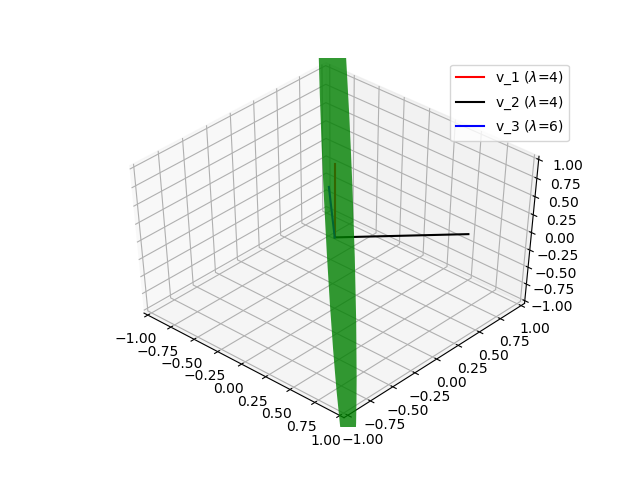

In [18]:
### Note about this cell: you need first to run the following cell, then come back and run this one!

# a matrix
A = [ [ 5,  -1,  0], 
      [-1,   5,  0],
      [1/3,-1/3, 4] ]

# its eigendecomposition
D,V = np.linalg.eig(A)

# sort eigenvalues
i=np.argsort(D)
D = D[i]
V = V[:,i]

plt.close()

## plot eigenvectors
fig = plt.figure()
ax = fig.gca(projection='3d')

# plot eigenvectors of A
ax.plot([0,V[0,0]],[0,V[1,0]],[0,V[2,0]],'r',label='v_1 ($\lambda$=%g)' %D[0])
ax.plot([0,V[0,1]],[0,V[1,1]],[0,V[2,1]],'k',label='v_2 ($\lambda$=%g)' %D[1])
ax.plot([0,V[0,2]],[0,V[1,2]],[0,V[2,2]],'b',label='v_3 ($\lambda$=%g)' %D[2])
plt.legend()

# plot subspace spanned by same-eigenvalued eigenvectors
plot_plane(ax, V[:,0],V[:,1],size=3)
ax.set_xlim3d(-1,1)
ax.set_ylim3d(-1,1)
ax.set_zlim3d(-1,1)

plt.show()



---
# Eigendecomposition of symmetric matrices
---


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


<IPython.core.display.Javascript object>


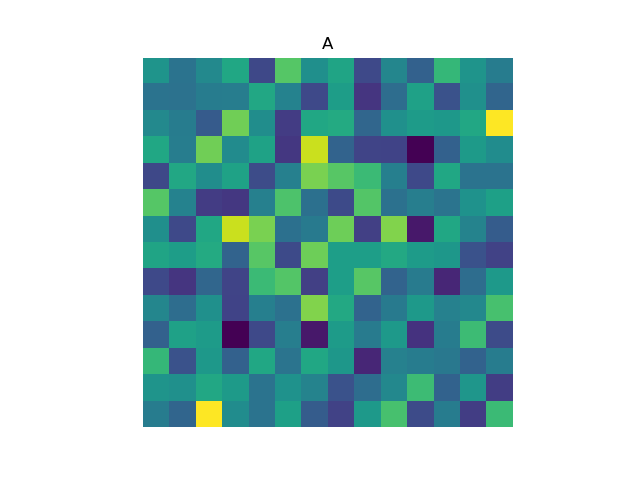

In [11]:
# create a random matrix
A = np.random.randn(14,14)

# make it symmetric (additive method)
A = A+A.T

# diagonalize it
evals,evecs = np.linalg.eig(A)

# magnitudes of each vector
print( np.sqrt( sum(evecs**2) ) )

plt.close()
# and make plots
plt.imshow(A)
plt.axis('off')
plt.title('A')
plt.show()




<IPython.core.display.Javascript object>


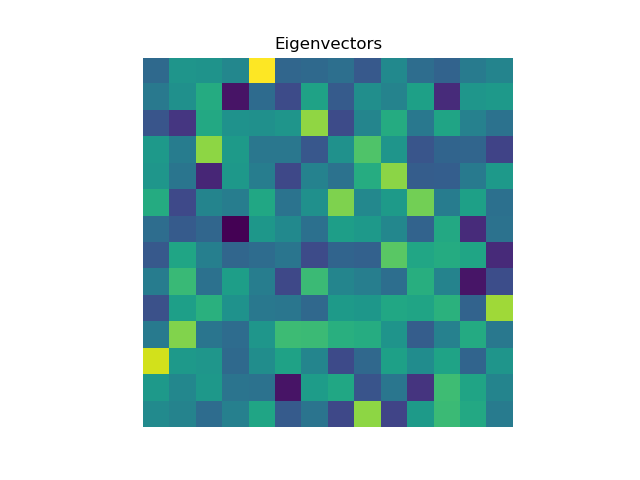

In [9]:
plt.close()
plt.imshow(evecs)
plt.axis('off')
plt.title('Eigenvectors')
plt.show()



<IPython.core.display.Javascript object>


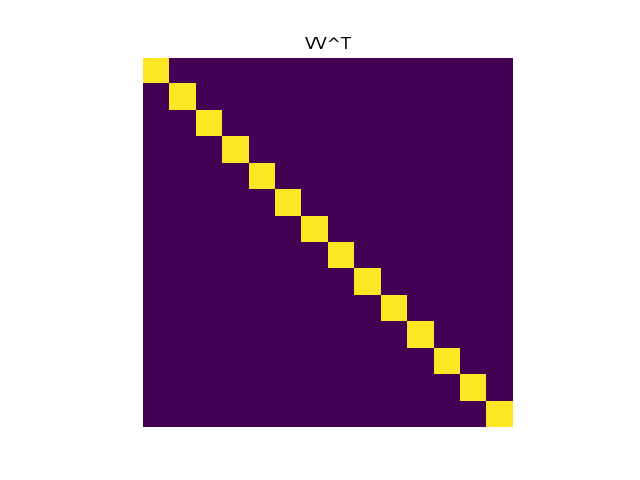

In [10]:
plt.close()
plt.imshow(evecs@evecs.T)
plt.axis('off')
plt.title('VV^T')
plt.show()

# Reconstruct a matrix from eigenlayers

In [103]:
# create an mxm symetric matrix, take eigen decomposition
# show that the norm of the outer product of v_i
# create one layer of A as 1vv' compute its norm 
# reconstruct the original matrix A over the eigenlayers (outer products)
m = 5
A = np.random.randn(m,m)
A = np.transpose(A)@A

D, V = np.linalg.eig(A)

D = np.diag(D)

In [105]:
D

array([[10.42474611,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  6.17953161,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  3.78558913,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.8363388 ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.09962534]])

In [104]:
V

array([[ 0.1895452 ,  0.61300869,  0.31360222,  0.69200694,  0.10522835],
       [ 0.85212964,  0.05542079, -0.47964647, -0.09242   ,  0.17944756],
       [ 0.4749886 , -0.42275055,  0.6126971 ,  0.03786171, -0.46779971],
       [-0.05992718, -0.66463977, -0.16093684,  0.62044839,  0.37921742],
       [ 0.09350006, -0.02616952,  0.51989856, -0.35523968,  0.7707679 ]])

In [40]:
D[2, 2]

2.6236001011836376

In [52]:
t = np.outer(V[:,2], np.outer(D[2, 2], np.transpose(V[:,2])))

print(np.linalg.matrix_rank(t))
print(np.linalg.norm(t))

1
2.6236001011836376


In [61]:
Arecon = np.zeros((m,m))

for i in range(m):
    tmpT = np.outer(D[i, i], np.transpose(V[:,i]))
    tmpLayer = np.outer(V[:,i], tmpT)
    Arecon = Arecon + tmpLayer
    print(np.linalg.matrix_rank(Arecon))

1
2
3
4
5


In [62]:
Arecon

array([[ 6.23422083, -1.33277087,  0.74140824, -0.40562689, -0.55102425],
       [-1.33277087,  9.9591442 , -2.10036735, -6.05499141,  2.13296115],
       [ 0.74140824, -2.10036735,  1.4210503 ,  0.64020371, -0.94045922],
       [-0.40562689, -6.05499141,  0.64020371,  4.27843741, -0.99534788],
       [-0.55102425,  2.13296115, -0.94045922, -0.99534788,  2.99482154]])

In [63]:
A

array([[ 6.23422083, -1.33277087,  0.74140824, -0.40562689, -0.55102425],
       [-1.33277087,  9.9591442 , -2.10036735, -6.05499141,  2.13296115],
       [ 0.74140824, -2.10036735,  1.4210503 ,  0.64020371, -0.94045922],
       [-0.40562689, -6.05499141,  0.64020371,  4.27843741, -0.99534788],
       [-0.55102425,  2.13296115, -0.94045922, -0.99534788,  2.99482154]])

# Trace and determinant, eignenvalues sum and product

In [81]:
# tract(A) = sum(evals)
# det(A) = prod(evals)
m = 7
A = np.random.randn(m,m)
tr = np.trace(A)
det = np.linalg.det(A)

l = np.linalg.eig(A)[0]

print("Trace %s and sum of eignvalues %s" %(round(tr, 2), 
                                            round(sum(l), 2)))

print("Determinant %s and product of eignvalues %s" %(round(det, 2), 
                                            round(np.prod(l), 2)))

Trace 1.87 and sum of eignvalues (1.87+0j)
Determinant -71.9 and product of eignvalues (-71.9+0j)


In [84]:
A2 = np.random.randn(7,5) @ np.random.randn(5,7)
tr = np.trace(A2)
det = np.linalg.det(A2)
l = np.linalg.eig(A2)[0]

print("Trace %s and sum of eignvalues %s" %(round(tr, 2), 
                                            round(sum(l), 2)))

print("Determinant %s and product of eignvalues %s" %(round(det, 2), 
                                            round(np.prod(l), 2)))

Trace 3.68 and sum of eignvalues (3.68+0j)
Determinant 0.0 and product of eignvalues 0j



---
# VIDEO: Generalized eigendecomposition
---


<IPython.core.display.Javascript object>


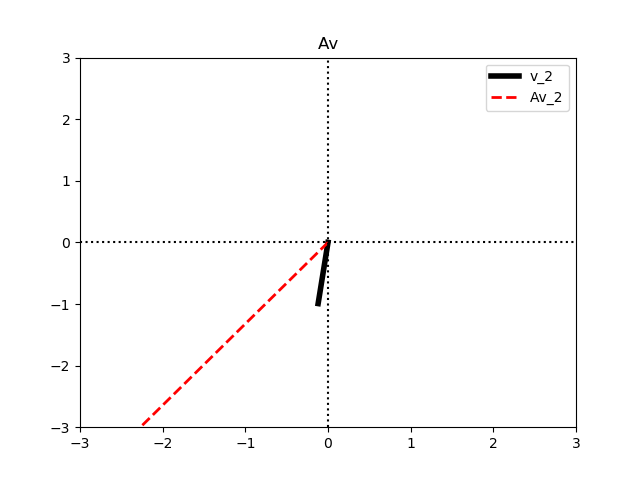

In [91]:
import scipy.linalg as sp# kindof annoying, but numpy doesn't do GED

# define matrices
A = np.array([ [3,2], [1,3]])
B = np.array([ [1,1], [4,1]])

# GED
eigvals,eigvecs = sp.eig(A,B)


# matrix-vector multiplication
Av = A@eigvecs[:,1]
Bv = B@eigvecs[:,1]
BinvAv = np.linalg.inv(B)@A@eigvecs[:,1]

plt.close()
plt.plot([0,eigvecs[0,1]],[0,eigvecs[1,1]],'k',linewidth=4,label='v_2')
plt.plot([0,Av[0]],[0,Av[1]],'r--',linewidth=2,label='Av_2')
plt.xlim([-3,3]), plt.ylim([-3,3])
plt.plot([-3,3],[0,0],'k:')
plt.plot([0,0],[-3,3],'k:')
plt.legend()
plt.title('Av')
plt.show()


<IPython.core.display.Javascript object>


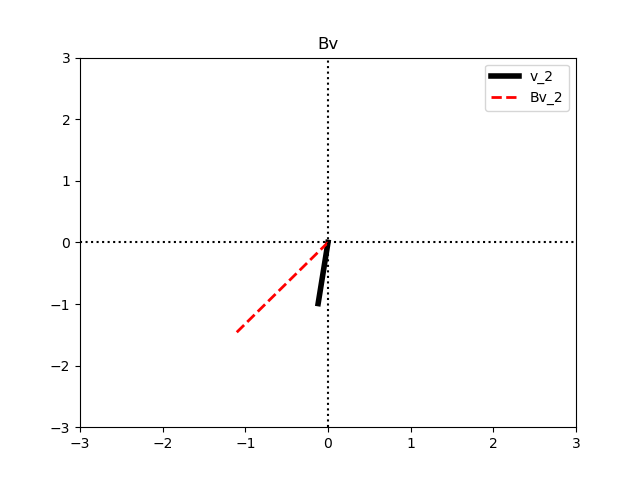

In [92]:
plt.close()
plt.plot([0,eigvecs[0,1]],[0,eigvecs[1,1]],'k',linewidth=4,label='v_2')
plt.plot([0,Bv[0]],[0,Bv[1]],'r--',linewidth=2,label='Bv_2')
plt.xlim([-3,3]), plt.ylim([-3,3])
plt.plot([-3,3],[0,0],'k:')
plt.plot([0,0],[-3,3],'k:')
plt.legend()
plt.title('Bv')
plt.show()



<IPython.core.display.Javascript object>


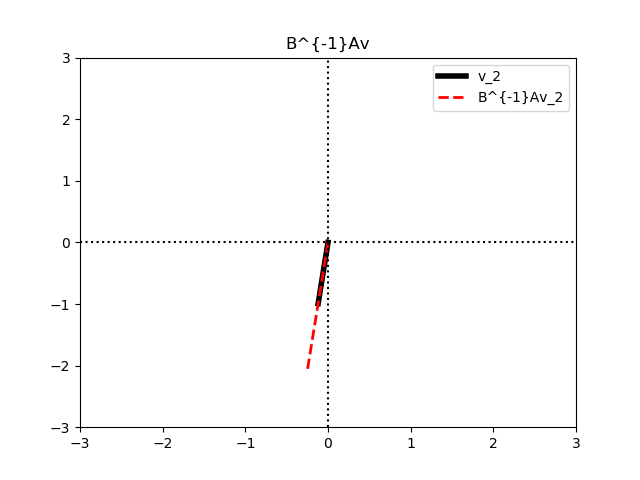

In [93]:
plt.close()
plt.plot([0,eigvecs[0,1]],[0,eigvecs[1,1]],'k',linewidth=4,label='v_2')
plt.plot([0,BinvAv[0]],[0,BinvAv[1]],'r--',linewidth=2,label='B^{-1}Av_2')
plt.xlim([-3,3]), plt.ylim([-3,3])
plt.plot([-3,3],[0,0],'k:')
plt.plot([0,0],[-3,3],'k:')
plt.legend()
plt.title('B^{-1}Av')
plt.show()



# GED in small and large matrices

$\text{Sv} = \lambda \text{v}$

$\text{Sv} = \lambda \text{I} \text{v}$

$\text{Sv} = \lambda \text{R} \text{v}$

$\text{R}^{-1}\text{Sv} = \lambda \text{v}$

<IPython.core.display.Javascript object>


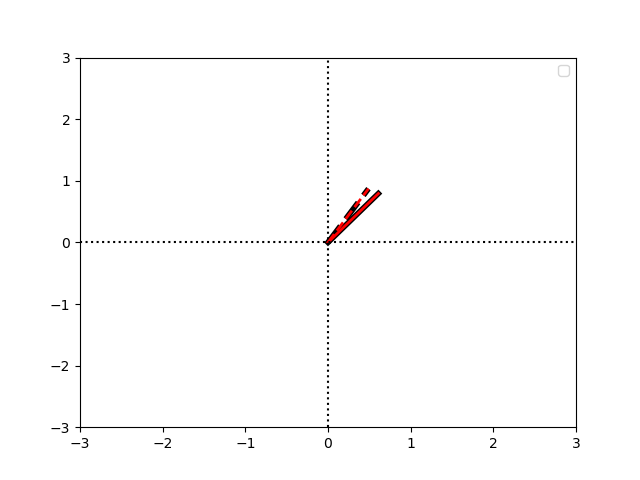

No handles with labels found to put in legend.


In [119]:
# compare eig(S,R) with eig(inv(R) * S)

# GED on 2x2 matrix. plot eigenvectors

# with real data matrices. plot eignvalues

S = np.random.randn(2, 2)
R = np.random.randn(2, 2)

Ls, Ws = sp.eig(S, R)
#Ls = npLs)

Li, Wi = sp.eig(np.linalg.inv(R)@S)
#Li = np.diag(Li)

plt.close()
plt.plot([0,Ws[0,0]],[0,Ws[1,0]],'k-',linewidth=4)#,label='v_2')
plt.plot([0,Ws[0,1]],[0,Ws[1,1]],'k--',linewidth=4)#,label='v_2')

plt.plot([0,Wi[0, 0]],[0,Wi[1, 0]],'r-',linewidth=2)#,label='B^{-1}Av_2')
plt.plot([0,Wi[0, 1]],[0,Wi[1, 1]],'r--',linewidth=2)#,label='B^{-1}Av_2')
plt.xlim([-3,3]), plt.ylim([-3,3])
plt.plot([-3,3],[0,0],'k:')
plt.plot([0,0],[-3,3],'k:')
plt.legend()
#plt.title('B^{-1}Av')
plt.show()



In [131]:
R

array([[-0.70283389,  0.51991349],
       [ 1.01109633, -0.71803368]])

In [134]:
import scipy.io as sio
data = sio.loadmat('real_matrices.mat')

R = data['R']
S = data['S']

In [135]:
Ls, Ws = sp.eig(S, R)
#Ls = npLs)

Li, Wi = sp.eig(np.linalg.inv(R)@S)
#Li = np.diag(Li)

<IPython.core.display.Javascript object>


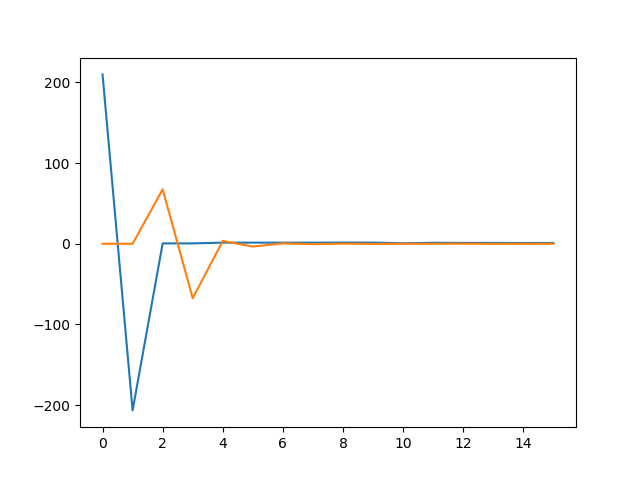

In [145]:
# Real R is not invertable
plt.close()
plt.plot(np.real(Li))
plt.plot(np.imag(Li))